In [1]:
from functions import *

In [2]:
get_list_of_zip_files(directory="C:\\Users\\KonuTech")[0:2]

['home-data-for-ml-course.zip',
 'house-prices-advanced-regression-techniques.zip']

In [3]:
unzip_files(directory="C:\\Users\\KonuTech"
            ,output_directory="C:\\Users\\KonuTech\\Downloads\\house-prices-advanced-regression-techniques"
            ,zip_file_name="house-prices-advanced-regression-techniques.zip")

Unpacked house-prices-advanced-regression-techniques.zip to: C:\Users\KonuTech\Downloads\house-prices-advanced-regression-techniques



In [4]:
change_current_working_directory(directory="C:\\Users\\KonuTech\\Downloads\\house-prices-advanced-regression-techniques")

'C:\\Users\\KonuTech\\Downloads\\house-prices-advanced-regression-techniques'

In [5]:
get_list_of_files_by_extension(directory="C:\\Users\\KonuTech\\Downloads\\house-prices-advanced-regression-techniques"
                               ,extension="csv")

['sample_submission.csv', 'submission.csv', 'test.csv', 'train.csv']

# Data description

In [6]:
#f = open("data_description.txt", "r")
#print(f.read())

# Train data

In [7]:
train = pd.read_csv('train.csv')
train = train.drop(columns="Id", axis=1)
train

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
4          350.0        Gd        TA      PConc       Gd       TA   


In [8]:
train.shape

(1460, 80)

### Transformation of Int columns to Float columns

In [9]:
train[train.select_dtypes(include=['int64']).columns] = train[train.select_dtypes(include=['int64']).columns].astype(float)

In [10]:
round(train.describe(),2)

MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
count      1460.0      1201.00    1460.00      1460.00      1460.00   
mean         56.9        70.05   10516.83         6.10         5.58   
std          42.3        24.28    9981.26         1.38         1.11   
min          20.0        21.00    1300.00         1.00         1.00   
25%          20.0        59.00    7553.50         5.00         5.00   
50%          50.0        69.00    9478.50         6.00         5.00   
75%          70.0        80.00   11601.50         7.00         6.00   
max         190.0       313.00  215245.00        10.00         9.00   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
count    1460.00       1460.00     1452.00     1460.00     1460.00    1460.00   
mean     1971.27       1984.87      103.69      443.64       46.55     567.24   
std        30.20         20.65      181.07      456.10      161.32     441.87   
min      1872.00       1950.00        0.00        0.00        0.00       0.00   
25%      1954.00       1967.00        0.00        0.00        0.00     223.00   
50%      1973.00       1994.00        0.00      383.50        0.00     477.50   
75%      2000.00       2004.00      166.00      712.25        0.00     808.00   
max      2010.00       2010.00     1600.00     5644.00     1474.00    2336.00   

       TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
count      1460.00   1460.00   1460.00       1460.00    1460.00       1460.00   
mean       1057.43   1162.63    346.99          5.84    1515.46          0.43   
std         438.71    386.59    436.53         48.62     525.48          0.52   
min           0.00    334.00      0.00          0.00     334.00          0.00   
25%         795.75    882.00      0.00          0.00    1129.50          0.00   
50%         991.50   1087.00      0.00          0.00    1464.00          0.00   
75%        1298.25   1391.25    728.00          0.00    1776.75          1.00   
max        6110.00   4692.00   2065.00        572.00    5642.00          3.00   

       BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
count       1460.00   1460.00   1460.00       1460.00       1460.00   
mean           0.06      1.57      0.38          2.87          1.05   
std            0.24      0.55      0.50          0.82          0.22   
min            0.00      0.00      0.00          0.00          0.00   
25%            0.00      1.00      0.00          2.00          1.00   
50%            0.00      2.00      0.00          3.00          1.00   
75%            0.00      2.00      1.00          3.00          1.00   
max            2.00      3.00      2.00          8.00          3.00   

       TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
count       1460.00     1460.00      1379.00     1460.00     1460.00   
mean           6.52        0.61      1978.51        1.77      472.98   
std            1.63        0.64        24.69        0.75      213.80   
min            2.00        0.00      1900.00        0.00        0.00   
25%            5.00        0.00      1961.00        1.00      334.50   
50%            6.00        1.00      1980.00        2.00      480.00   
75%            7.00        1.00      2002.00        2.00      576.00   
max           14.00        3.00      2010.00        4.00     1418.00   

       WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
count     1460.00      1460.00        1460.00    1460.00      1460.00   
mean        94.24        46.66          21.95       3.41        15.06   
std        125.34        66.26          61.12      29.32        55.76   
min          0.00         0.00           0.00       0.00         0.00   
25%          0.00         0.00           0.00       0.00         0.00   
50%          0.00        25.00           0.00       0.00         0.00   
75%        168.00        68.00           0.00       0.00         0.00   
max        857.00       547.00    

In [11]:
train.describe(include='object')

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460       1452      1460   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1141     1434         515         504        864       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

# DEALING WITH NULL VALUES

#### Number of columns with Null values

In [12]:
(train.isnull().sum() > 0).sum()

19

### Summary statistics of mising data

#### Counts

In [13]:
missing_data_count = pd.DataFrame(train.isnull().sum().sort_values(ascending=False))
missing_data_count.T

PoolQC  MiscFeature  Alley  Fence  FireplaceQu  LotFrontage  GarageType  \
0    1453         1406   1369   1179          690          259          81   

   GarageCond  GarageFinish  GarageQual  GarageYrBlt  BsmtFinType2  \
0          81            81          81           81            38   

   BsmtExposure  BsmtQual  BsmtCond  BsmtFinType1  MasVnrArea  MasVnrType  \
0            38        37        37            37           8           8   

   Electrical  RoofMatl  Exterior1st  RoofStyle  ExterQual  Exterior2nd  \
0           1         0            0          0          0            0   

   YearBuilt  ExterCond  Foundation  YearRemodAdd  SalePrice  OverallCond  \
0          0          0           0             0          0            0   

   OverallQual  HouseStyle  BldgType  Condition2  Condition1  Neighborhood  \
0            0           0         0           0           0             0   

   LandSlope  LotConfig  Utilities  LandContour  LotShape  Street  LotArea  \
0          0          0          0            0         0       0        0   

   MSZoning  BsmtFinSF1  HeatingQC  BsmtFinSF2  EnclosedPorch  Fireplaces  \
0         0           0          0           0              0           0   

   GarageCars  GarageArea  PavedDrive  WoodDeckSF  OpenPorchSF  3SsnPorch  \
0           0           0           0           0            0          0   

   BsmtUnfSF  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  \
0          0            0         0        0       0       0         0   

   Functional  TotRmsAbvGrd  KitchenQual  KitchenAbvGr  BedroomAbvGr  \
0           0             0            0             0             0   

   HalfBath  FullBath  BsmtHalfBath  BsmtFullBath  GrLivArea  LowQualFinSF  \
0         0         0             0             0          0             0   

   2ndFlrSF  1stFlrSF  CentralAir  SaleCondition  Heating  TotalBsmtSF  \
0         0         0           0              0        0            0   

   MSSubClass  
0           0

In [14]:
round(missing_data_count[missing_data_count > 0].describe(),3).T

count     mean      std  min   25%   50%    75%     max
0   19.0  366.579  546.816  1.0  37.0  81.0  474.5  1453.0

#### Percetages

In [15]:
missing_data_percentage = pd.DataFrame(((train.isnull().sum().sort_values(ascending=False))/train.shape[0]))
missing_data_percentage.T

PoolQC  MiscFeature     Alley     Fence  FireplaceQu  LotFrontage  \
0  0.995205     0.963014  0.937671  0.807534     0.472603     0.177397   

   GarageType  GarageCond  GarageFinish  GarageQual  GarageYrBlt  \
0    0.055479    0.055479      0.055479    0.055479     0.055479   

   BsmtFinType2  BsmtExposure  BsmtQual  BsmtCond  BsmtFinType1  MasVnrArea  \
0      0.026027      0.026027  0.025342  0.025342      0.025342    0.005479   

   MasVnrType  Electrical  RoofMatl  Exterior1st  RoofStyle  ExterQual  \
0    0.005479    0.000685       0.0          0.0        0.0        0.0   

   Exterior2nd  YearBuilt  ExterCond  Foundation  YearRemodAdd  SalePrice  \
0          0.0        0.0        0.0         0.0           0.0        0.0   

   OverallCond  OverallQual  HouseStyle  BldgType  Condition2  Condition1  \
0          0.0          0.0         0.0       0.0         0.0         0.0   

   Neighborhood  LandSlope  LotConfig  Utilities  LandContour  LotShape  \
0           0.0        0.0        0.0        0.0          0.0       0.0   

   Street  LotArea  MSZoning  BsmtFinSF1  HeatingQC  BsmtFinSF2  \
0     0.0      0.0       0.0         0.0        0.0         0.0   

   EnclosedPorch  Fireplaces  GarageCars  GarageArea  PavedDrive  WoodDeckSF  \
0            0.0         0.0         0.0         0.0         0.0         0.0   

   OpenPorchSF  3SsnPorch  BsmtUnfSF  ScreenPorch  PoolArea  MiscVal  MoSold  \
0          0.0        0.0        0.0          0.0       0.0      0.0     0.0   

   YrSold  SaleType  Functional  TotRmsAbvGrd  KitchenQual  KitchenAbvGr  \
0     0.0       0.0         0.0           0.0          0.0           0.0   

   BedroomAbvGr  HalfBath  FullBath  BsmtHalfBath  BsmtFullBath  GrLivArea  \
0           0.0       0.0       0.0           0.0           0.0        0.0   

   LowQualFinSF  2ndFlrSF  1stFlrSF  CentralAir  SaleCondition  Heating  \
0           0.0       0.0       0.0         0.0            0.0      0.0   

   TotalBsmtSF  MSSubClass  
0          0.0         0.0

In [16]:
round(missing_data_percentage[missing_data_percentage > 0].describe(),3).T

count   mean    std    min    25%    50%    75%    max
0   19.0  0.251  0.375  0.001  0.025  0.055  0.325  0.995

# Imputation of Null values

## Floats columns imputation

### Find float columns with missing values

In [17]:
floats_with_nulls = pd.DataFrame(train.select_dtypes(include=['float64']).isnull().sum()) > 0
floats_with_nulls = floats_with_nulls[floats_with_nulls[0] == True].T.columns
floats_with_nulls

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

### Print counts of unique values including Null values

In [18]:
count_unique_values(dataframe=train
                    ,variables=floats_with_nulls)

LotFrontage count distinct:
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
38.0       1
138.0      1
140.0      1
137.0      1
nan      259
Length: 111, dtype: int64

MasVnrArea count distinct:
0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
337.0      1
415.0      1
293.0      1
621.0      1
nan        8
Length: 328, dtype: int64

GarageYrBlt count distinct:
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1933.0     1
1900.0     1
1906.0     1
nan       81
Length: 98, dtype: int64



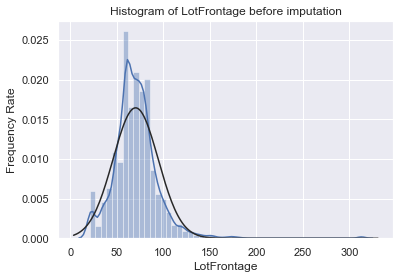

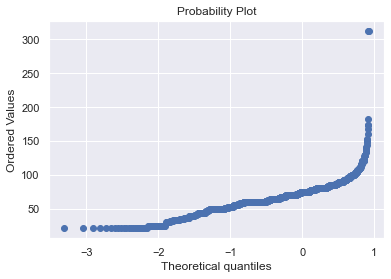

<Figure size 432x288 with 0 Axes>

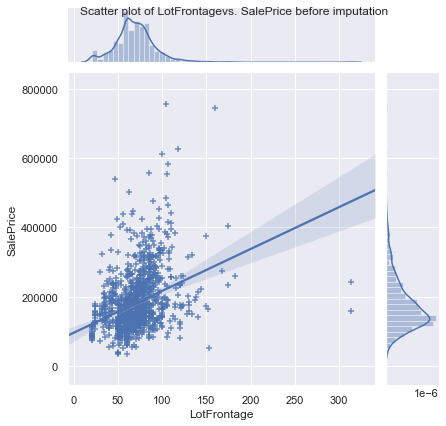

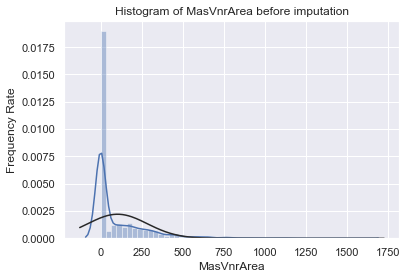

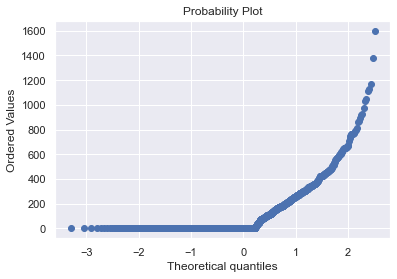

<Figure size 432x288 with 0 Axes>

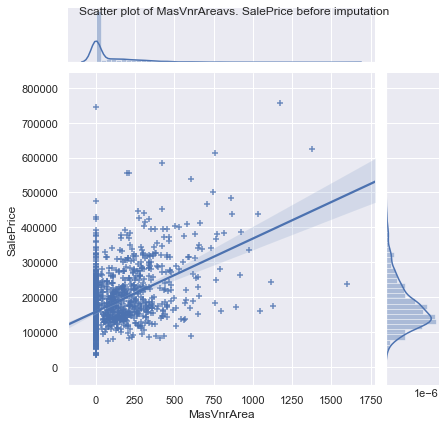

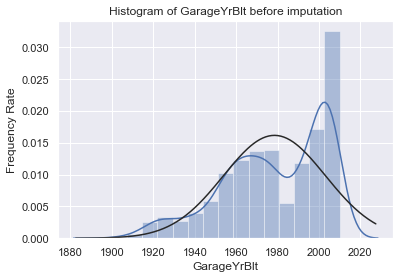

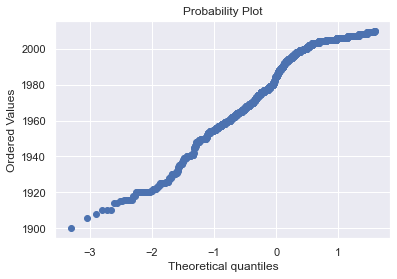

<Figure size 432x288 with 0 Axes>

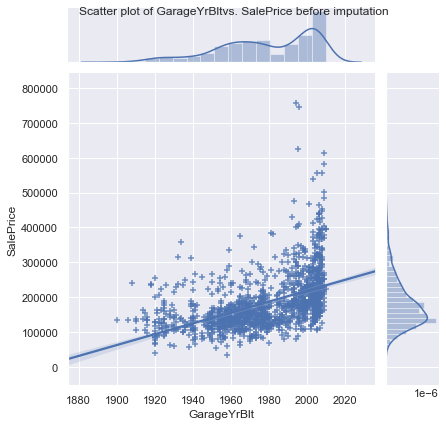

<Figure size 432x288 with 0 Axes>

In [19]:
visualise_floats(dataframe=train
          ,variables=floats_with_nulls
          ,target="SalePrice")

LotFrontage  MasVnrArea  GarageYrBlt
0            65.0       196.0       2003.0
1            80.0         0.0       1976.0
2            68.0       162.0       2001.0
3            60.0         0.0       1998.0
4            84.0       350.0       2000.0
...           ...         ...          ...
1455         62.0         0.0       1999.0
1456         85.0       119.0       1978.0
1457         66.0         0.0       1941.0
1458         68.0         0.0       1950.0
1459         75.0         0.0       1965.0

[1460 rows x 3 columns]

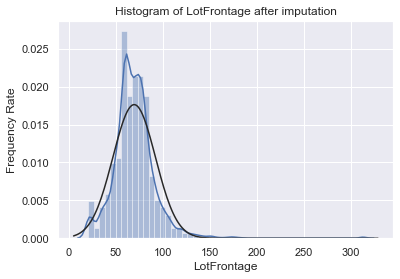

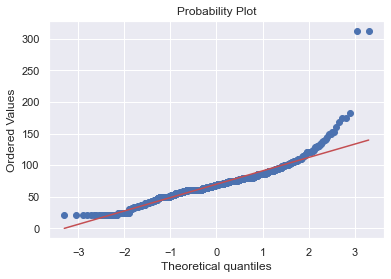

<Figure size 432x288 with 0 Axes>

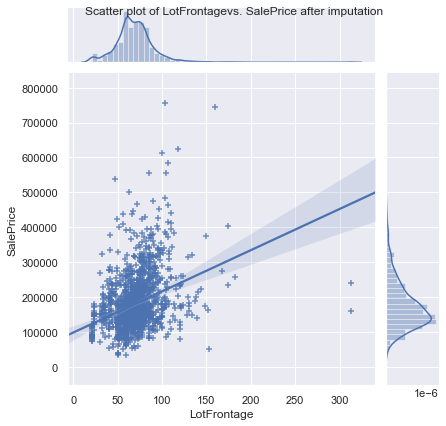

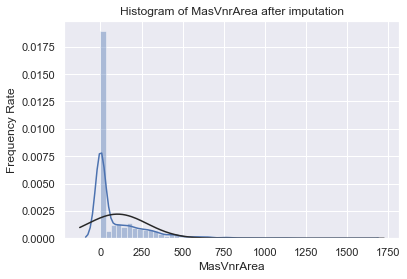

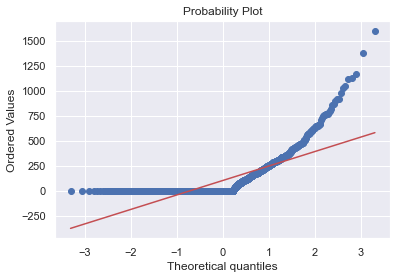

<Figure size 432x288 with 0 Axes>

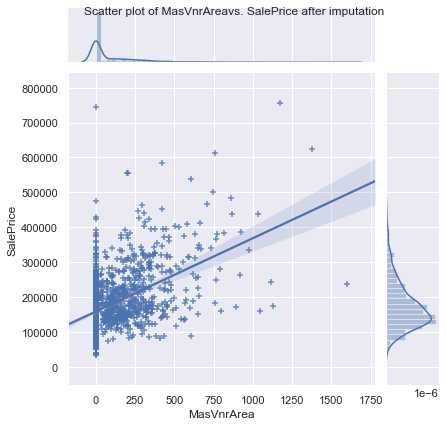

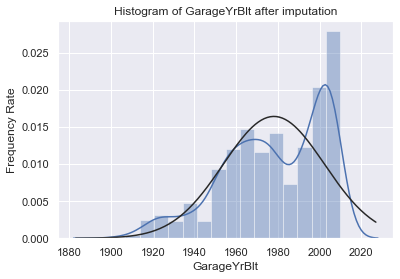

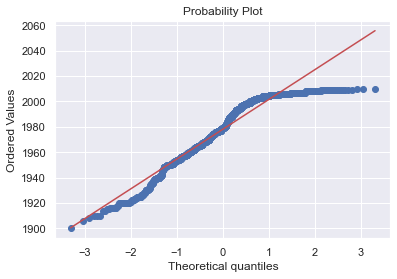

<Figure size 432x288 with 0 Axes>

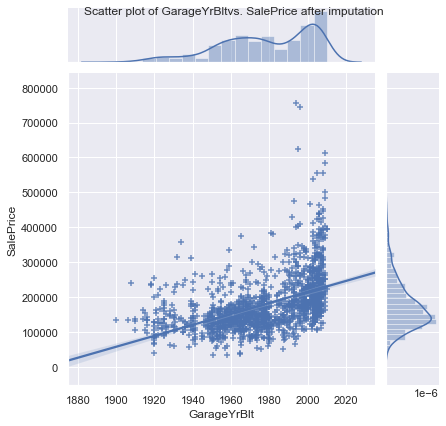

<Figure size 432x288 with 0 Axes>

In [20]:
floats_without_nulls = choose_imputer_and_visualise_floats(dataframe=train
                                                           ,variables=floats_with_nulls
                                                           ,target="SalePrice"
                                                           ,imputer=KNNImputer
                                                           ,strategy=None
                                                           ,weights="distance")
floats_without_nulls

### Summary statistics of Floats before imputation

In [21]:
train[floats_with_nulls].describe()

LotFrontage   MasVnrArea  GarageYrBlt
count  1201.000000  1452.000000  1379.000000
mean     70.049958   103.685262  1978.506164
std      24.284752   181.066207    24.689725
min      21.000000     0.000000  1900.000000
25%      59.000000     0.000000  1961.000000
50%      69.000000     0.000000  1980.000000
75%      80.000000   166.000000  2002.000000
max     313.000000  1600.000000  2010.000000

In [22]:
before = pd.DataFrame(train[floats_with_nulls].isnull().sum())
before.T

LotFrontage  MasVnrArea  GarageYrBlt
0          259           8           81

### Summary statistics of Floats after imputation

In [23]:
floats_without_nulls.describe()

LotFrontage   MasVnrArea  GarageYrBlt
count  1460.000000  1460.000000  1460.000000
mean     69.601956   103.605031  1978.088324
std      22.624028   180.689072    24.317955
min      21.000000     0.000000  1900.000000
25%      59.000000     0.000000  1961.000000
50%      68.539288     0.000000  1979.000000
75%      80.000000   165.250000  2001.000000
max     313.000000  1600.000000  2010.000000

In [24]:
after = pd.DataFrame(floats_without_nulls.isnull().sum())
after.T

LotFrontage  MasVnrArea  GarageYrBlt
0            0           0            0

## Category columns imputation

## Find Category columns with null values

In [25]:
category_with_nulls = pd.DataFrame(train.select_dtypes(include=['object']).isnull().sum()) > 0
category_with_nulls = category_with_nulls[category_with_nulls[0] == True].T.columns
category_with_nulls

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

### Print counts of unique values including Null values

In [26]:
count_unique_values(dataframe=train
                    ,variables=category_with_nulls)

Alley count distinct:
Grvl      50
Pave      41
nan     1369
dtype: int64

MasVnrType count distinct:
None       864
BrkFace    445
Stone      128
BrkCmn      15
nan          8
dtype: int64

BsmtQual count distinct:
TA     649
Gd     618
Ex     121
Fa      35
nan     37
dtype: int64

BsmtCond count distinct:
TA     1311
Gd       65
Fa       45
Po        2
nan      37
dtype: int64

BsmtExposure count distinct:
No     953
Av     221
Gd     134
Mn     114
nan     38
dtype: int64

BsmtFinType1 count distinct:
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
nan     37
dtype: int64

BsmtFinType2 count distinct:
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
nan      38
dtype: int64

Electrical count distinct:
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
nan         1
dtype: int64

FireplaceQu count distinct:
Gd     380
TA     313
Fa      33
Ex      24
Po      20
nan    690
dtype: int64

GarageType count distinct:
Attchd     

Alley MasVnrType BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0     Grvl    BrkFace       Gd       TA           No          GLQ   
1     Grvl       None       Gd       TA           Gd          ALQ   
2     Grvl    BrkFace       Gd       TA           Mn          GLQ   
3     Grvl       None       TA       Gd           No          ALQ   
4     Grvl    BrkFace       Gd       TA           Av          GLQ   
...    ...        ...      ...      ...          ...          ...   
1455  Grvl       None       Gd       TA           No          Unf   
1456  Grvl      Stone       Gd       TA           No          ALQ   
1457  Grvl       None       TA       Gd           No          GLQ   
1458  Grvl       None       TA       TA           Mn          GLQ   
1459  Grvl       None       TA       TA           No          BLQ   

     BsmtFinType2 Electrical FireplaceQu GarageType GarageFinish GarageQual  \
0             Unf      SBrkr          Gd     Attchd          RFn         TA   
1             Unf      SBrkr          TA     Attchd          RFn         TA   
2             Unf      SBrkr          TA     Attchd          RFn         TA   
3             Unf      SBrkr          Gd     Detchd          Unf         TA   
4             Unf      SBrkr          TA     Attchd          RFn         TA   
...           ...        ...         ...        ...          ...        ...   
1455          Unf      SBrkr          TA     Attchd          RFn         TA   
1456          Rec      SBrkr          TA     Attchd          Unf         TA   
1457          Unf      SBrkr          Gd     Attchd          RFn         TA   
1458          Rec      FuseA          Gd     Attchd          Unf         TA   
1459          LwQ      SBrkr          Gd     Attchd          Fin         TA   

     GarageCond PoolQC  Fence MiscFeature  
0            TA     Gd  MnPrv        Shed  
1            TA     Gd  MnPrv        Shed  
2            TA     Gd  MnPrv        Shed  
3            TA     Gd  MnPrv        Shed  
4            TA     Gd  MnPrv        Shed  
...         ...    ...    ...         ...  
1455         TA     Gd  MnPrv        Shed  
1456         TA     Gd  MnPrv        Shed  
1457         TA     Gd  GdPrv        Shed  
1458         TA     Gd  MnPrv        Shed  
1459         TA     Gd  MnPrv        Shed  

[1460 rows x 16 columns]

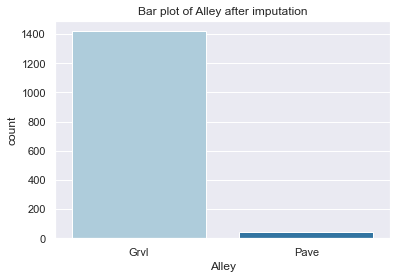

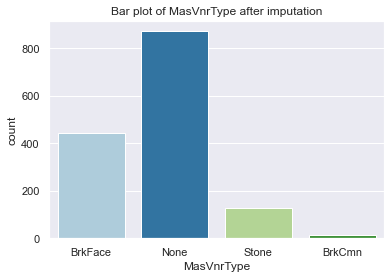

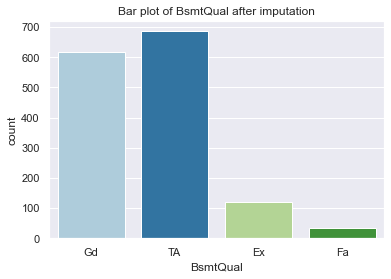

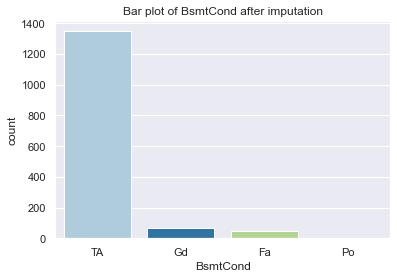

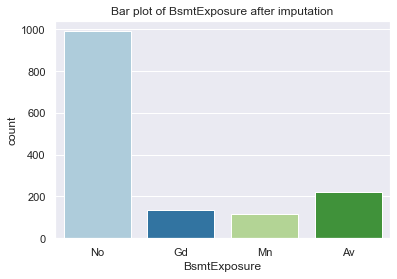

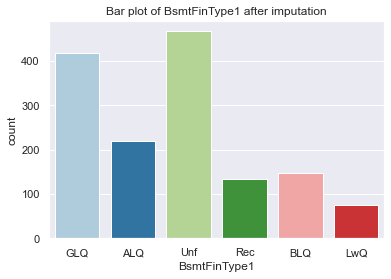

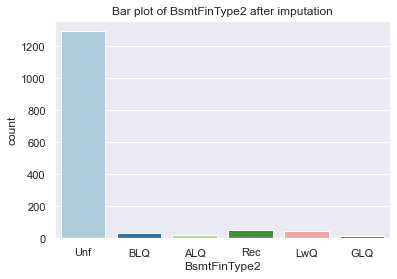

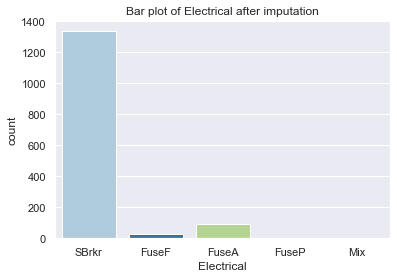

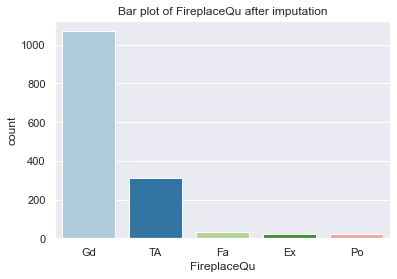

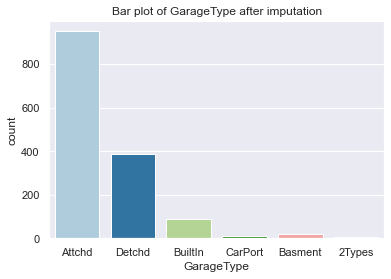

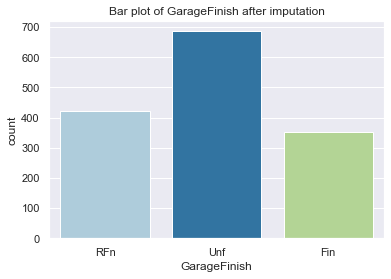

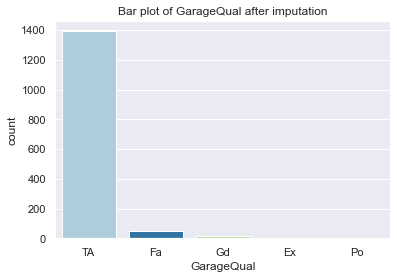

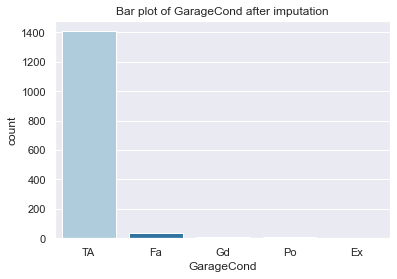

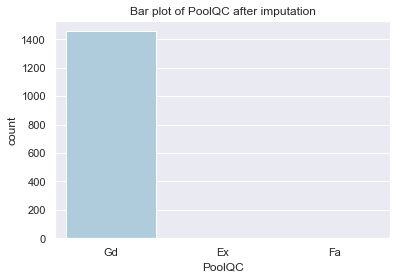

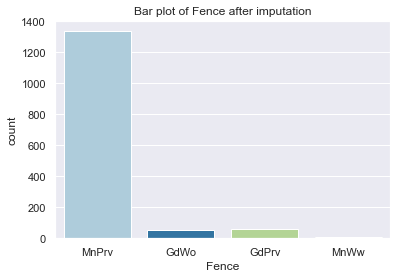

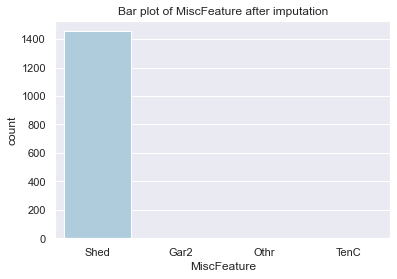

<Figure size 432x288 with 0 Axes>

In [27]:
category_without_nulls = choose_imputer_and_visualise_categories(dataframe=train
                                                                ,variables=category_with_nulls
                                                                ,target=None
                                                                ,imputer=SimpleImputer
                                                                ,strategy="most_frequent"
                                                                ,weights=None)
category_without_nulls

### Summary statistics of Categories before imputation

In [28]:
train[category_with_nulls].describe()

Alley MasVnrType BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count     91       1452     1423     1423         1422         1423   
unique     2          4        4        4            4            6   
top     Grvl       None       TA       TA           No          Unf   
freq      50        864      649     1311          953          430   

       BsmtFinType2 Electrical FireplaceQu GarageType GarageFinish GarageQual  \
count          1422       1459         770       1379         1379       1379   
unique            6          5           5          6            3          5   
top             Unf      SBrkr          Gd     Attchd          Unf         TA   
freq           1256       1334         380        870          605       1311   

       GarageCond PoolQC  Fence MiscFeature  
count        1379      7    281          54  
unique          5      3      4           4  
top            TA     Gd  MnPrv        Shed  
freq         1326      3    157          49

In [29]:
before = pd.DataFrame(train[category_with_nulls].isnull().sum())
before.T

Alley  MasVnrType  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0   1369           8        37        37            38            37   

   BsmtFinType2  Electrical  FireplaceQu  GarageType  GarageFinish  \
0            38           1          690          81            81   

   GarageQual  GarageCond  PoolQC  Fence  MiscFeature  
0          81          81    1453   1179         1406

### Summary statistics of Categories after imputation

In [30]:
category_without_nulls.describe()

Alley MasVnrType BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count   1460       1460     1460     1460         1460         1460   
unique     2          4        4        4            4            6   
top     Grvl       None       TA       TA           No          Unf   
freq    1419        872      686     1348          991          467   

       BsmtFinType2 Electrical FireplaceQu GarageType GarageFinish GarageQual  \
count          1460       1460        1460       1460         1460       1460   
unique            6          5           5          6            3          5   
top             Unf      SBrkr          Gd     Attchd          Unf         TA   
freq           1294       1335        1070        951          686       1392   

       GarageCond PoolQC  Fence MiscFeature  
count        1460   1460   1460        1460  
unique          5      3      4           4  
top            TA     Gd  MnPrv        Shed  
freq         1407   1456   1336        1455

In [31]:
after = pd.DataFrame(category_without_nulls.isnull().sum())
after.T

Alley  MasVnrType  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0      0           0         0         0             0             0   

   BsmtFinType2  Electrical  FireplaceQu  GarageType  GarageFinish  \
0             0           0            0           0             0   

   GarageQual  GarageCond  PoolQC  Fence  MiscFeature  
0           0           0       0      0            0

In [32]:
target = train.iloc[:,-1]

In [33]:
target

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

## Replacing original columns with imputed one

#### Replacing Floats

In [34]:
floats_without_nulls.columns

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [35]:
train[floats_without_nulls.columns] = floats_without_nulls

#### Replacing Categories

In [36]:
category_without_nulls.columns

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

In [37]:
train[category_without_nulls.columns] = category_without_nulls

## Feature engineering

### Copy of Train

In [38]:
train_imputed = train.copy()
train_imputed

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           60.0       RL         65.0   8450.0   Pave  Grvl      Reg   
1           20.0       RL         80.0   9600.0   Pave  Grvl      Reg   
2           60.0       RL         68.0  11250.0   Pave  Grvl      IR1   
3           70.0       RL         60.0   9550.0   Pave  Grvl      IR1   
4           60.0       RL         84.0  14260.0   Pave  Grvl      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455        60.0       RL         62.0   7917.0   Pave  Grvl      Reg   
1456        20.0       RL         85.0  13175.0   Pave  Grvl      Reg   
1457        70.0       RL         66.0   9042.0   Pave  Grvl      Reg   
1458        20.0       RL         68.0   9717.0   Pave  Grvl      Reg   
1459        20.0       RL         75.0   9937.0   Pave  Grvl      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story          7.0          5.0     2003.0   
1          Norm     1Fam     1Story          6.0          8.0     1976.0   
2          Norm     1Fam     2Story          7.0          5.0     2001.0   
3          Norm     1Fam     2Story          7.0          5.0     1915.0   
4          Norm     1Fam     2Story          8.0          5.0     2000.0   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story          6.0          5.0     1999.0   
1456       Norm     1Fam     1Story          6.0          6.0     1978.0   
1457       Norm     1Fam     2Story          7.0          9.0     1941.0   
1458       Norm     1Fam     1Story          5.0          6.0     1950.0   
1459       Norm     1Fam     1Story          5.0          6.0     1965.0   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0           2003.0     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1           1976.0     Gable  CompShg     MetalSd     MetalSd       None   
2           2002.0     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3           1970.0     Gable  CompShg     Wd Sdng     Wd Shng       None   
4           2000.0     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455        2000.0     Gable  CompShg     VinylSd     VinylSd       None   
1456        1988.0     Gable  CompShg     Plywood     Plywood      Stone   
1457        2006.0     Gable  CompShg     CemntBd     CmentBd       None   
1458        1996.0       Hip  CompShg     MetalSd     MetalSd       None   
1459        1965.0     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
4          350.0        Gd        TA      PConc       Gd       TA   


### Polynomial Features and Feature Interactions

In [39]:
# preprocessing.PolynomialFeatures([degree, …])
# Generate polynomial and interaction features.

In [40]:
train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [41]:
train.fillna(0, inplace=True)
train

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           60.0       RL         65.0   8450.0   Pave  Grvl      Reg   
1           20.0       RL         80.0   9600.0   Pave  Grvl      Reg   
2           60.0       RL         68.0  11250.0   Pave  Grvl      IR1   
3           70.0       RL         60.0   9550.0   Pave  Grvl      IR1   
4           60.0       RL         84.0  14260.0   Pave  Grvl      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455        60.0       RL         62.0   7917.0   Pave  Grvl      Reg   
1456        20.0       RL         85.0  13175.0   Pave  Grvl      Reg   
1457        70.0       RL         66.0   9042.0   Pave  Grvl      Reg   
1458        20.0       RL         68.0   9717.0   Pave  Grvl      Reg   
1459        20.0       RL         75.0   9937.0   Pave  Grvl      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story          7.0          5.0     2003.0   
1          Norm     1Fam     1Story          6.0          8.0     1976.0   
2          Norm     1Fam     2Story          7.0          5.0     2001.0   
3          Norm     1Fam     2Story          7.0          5.0     1915.0   
4          Norm     1Fam     2Story          8.0          5.0     2000.0   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story          6.0          5.0     1999.0   
1456       Norm     1Fam     1Story          6.0          6.0     1978.0   
1457       Norm     1Fam     2Story          7.0          9.0     1941.0   
1458       Norm     1Fam     1Story          5.0          6.0     1950.0   
1459       Norm     1Fam     1Story          5.0          6.0     1965.0   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0           2003.0     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1           1976.0     Gable  CompShg     MetalSd     MetalSd       None   
2           2002.0     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3           1970.0     Gable  CompShg     Wd Sdng     Wd Shng       None   
4           2000.0     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455        2000.0     Gable  CompShg     VinylSd     VinylSd       None   
1456        1988.0     Gable  CompShg     Plywood     Plywood      Stone   
1457        2006.0     Gable  CompShg     CemntBd     CmentBd       None   
1458        1996.0       Hip  CompShg     MetalSd     MetalSd       None   
1459        1965.0     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
4          350.0        Gd        TA      PConc       Gd       TA   


In [42]:
#np.any(np.isnan(train))

In [43]:
#np.all(np.isfinite(train))

In [44]:
features = pd.DataFrame(train.select_dtypes(include=['float64'])).columns

In [45]:
features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [46]:
poly = PolynomialFeatures(2, interaction_only=False)
fitted = poly.fit_transform(train[features])

In [47]:
fitted = pd.DataFrame(fitted, columns=poly.get_feature_names())
fitted

1    x0    x1       x2   x3   x4      x5      x6     x7     x8  \
0     1.0  60.0  65.0   8450.0  7.0  5.0  2003.0  2003.0  196.0  706.0   
1     1.0  20.0  80.0   9600.0  6.0  8.0  1976.0  1976.0    0.0  978.0   
2     1.0  60.0  68.0  11250.0  7.0  5.0  2001.0  2002.0  162.0  486.0   
3     1.0  70.0  60.0   9550.0  7.0  5.0  1915.0  1970.0    0.0  216.0   
4     1.0  60.0  84.0  14260.0  8.0  5.0  2000.0  2000.0  350.0  655.0   
...   ...   ...   ...      ...  ...  ...     ...     ...    ...    ...   
1455  1.0  60.0  62.0   7917.0  6.0  5.0  1999.0  2000.0    0.0    0.0   
1456  1.0  20.0  85.0  13175.0  6.0  6.0  1978.0  1988.0  119.0  790.0   
1457  1.0  70.0  66.0   9042.0  7.0  9.0  1941.0  2006.0    0.0  275.0   
1458  1.0  20.0  68.0   9717.0  5.0  6.0  1950.0  1996.0    0.0   49.0   
1459  1.0  20.0  75.0   9937.0  5.0  6.0  1965.0  1965.0    0.0  830.0   

          x9    x10     x11     x12     x13  x14     x15  x16  x17  x18  x19  \
0        0.0  150.0   856.0   856.0   854.0  0.0  1710.0  1.0  0.0  2.0  1.0   
1        0.0  284.0  1262.0  1262.0     0.0  0.0  1262.0  0.0  1.0  2.0  0.0   
2        0.0  434.0   920.0   920.0   866.0  0.0  1786.0  1.0  0.0  2.0  1.0   
3        0.0  540.0   756.0   961.0   756.0  0.0  1717.0  1.0  0.0  1.0  0.0   
4        0.0  490.0  1145.0  1145.0  1053.0  0.0  2198.0  1.0  0.0  2.0  1.0   
...      ...    ...     ...     ...     ...  ...     ...  ...  ...  ...  ...   
1455     0.0  953.0   953.0   953.0   694.0  0.0  1647.0  0.0  0.0  2.0  1.0   
1456   163.0  589.0  1542.0  2073.0     0.0  0.0  2073.0  1.0  0.0  2.0  0.0   
1457     0.0  877.0  1152.0  1188.0  1152.0  0.0  2340.0  0.0  0.0  2.0  0.0   
1458  1029.0    0.0  1078.0  1078.0     0.0  0.0  1078.0  1.0  0.0  1.0  0.0   
1459   290.0  136.0  1256.0  1256.0     0.0  0.0  1256.0  1.0  0.0  1.0  1.0   

      x20  x21  x22  x23     x24  x25    x26    x27   x28    x29  x30  x31  \
0     3.0  1.0  8.0  0.0  2003.0  2.0  548.0    0.0  61.0    0.0  0.0  0.0   
1     3.0  1.0  6.0  1.0  1976.0  2.0  460.0  298.0   0.0    0.0  0.0  0.0   
2     3.0  1.0  6.0  1.0  2001.0  2.0  608.0    0.0  42.0    0.0  0.0  0.0   
3     3.0  1.0  7.0  1.0  1998.0  3.0  642.0    0.0  35.0  272.0  0.0  0.0   
4     4.0  1.0  9.0  1.0  2000.0  3.0  836.0  192.0  84.0    0.0  0.0  0.0   
...   ...  ...  ...  ...     ...  ...    ...    ...   ...    ...  ...  ...   
1455  3.0  1.0  7.0  1.0  1999.0  2.0  460.0    0.0  40.0    0.0  0.0  0.0   
1456  3.0  1.0  7.0  2.0  1978.0  2.0  500.0  349.0   0.0    0.0  0.0  0.0   
1457  4.0  1.0  9.0  2.0  1941.0  1.0  252.0    0.0  60.0    0.0  0.0  0.0   
1458  2.0  1.0  5.0  0.0  1950.0  1.0  240.0  366.0   0.0  112.0  0.0  0.0   
1459  3.0  1.0  6.0  0.0  1965.0  1.0  276.0  736.0  68.0    0.0  0.0  0.0   

      x32     x33   x34     x35       x36    x0^2   x0 x1     x0 x2  x0 x3  \
0     0.0     0.0   2.0  2008.0  208500.0  3600.0  3900.0  507000.0  420.0   
1     0.0     0.0   5.0  2007.0  181500.0   400.0  1600.0  192000.0  120.0   
2     0.0     0.0   9.0  2008.0  223500.0  3600.0  4080.0  675000.0  420.0   
3     0.0     0.0   2.0  2006.0  140000.0  4900.0  4200.0  668500.0  490.0   
4     0.0     0.0  12.0  2008.0  250000.0  3600.0  5040.0  855600.0  480.0   
...   ...     ...   ...     ...       ...     ...     ...       ...    ...   
1455  0.0     0.0   8.0  2007.0  175000.0  3600.0  3720.0  475020.0  360.0   
1456  0.0     0.0   2.0  2010.0  210000.0   400.0  1700.0  263500.0  120.0   
1457  0.0  2500.0   5.0  2010.0  266500.0  4900.0  4620.0  632940.0  490.0   
1458  0.0     0.0   4.0  2010.0  142125.0   400.0  1360.0  194340.0  100.0   
1459  0.0     0.0   6.0  2008.0  147500.0   400.0  1500.0  198740.0  100.0   

      x0 x4     x0 x5     x0 x6    x0 x7    x0 x8    x0 x9   x0 x10   x0 x11  \
0     300.0  120180.0  120180.0  11760.0  42360.0      0.0   9000.0  51360.0   
1     160.0   39520.0   39520.0      0.0  19560.0      0.0   5680.0  25240.0   
2     300.0  120060.0  120120.0   9720.0  29

In [48]:
train = pd.concat([train, fitted], axis=1)
train

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           60.0       RL         65.0   8450.0   Pave  Grvl      Reg   
1           20.0       RL         80.0   9600.0   Pave  Grvl      Reg   
2           60.0       RL         68.0  11250.0   Pave  Grvl      IR1   
3           70.0       RL         60.0   9550.0   Pave  Grvl      IR1   
4           60.0       RL         84.0  14260.0   Pave  Grvl      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455        60.0       RL         62.0   7917.0   Pave  Grvl      Reg   
1456        20.0       RL         85.0  13175.0   Pave  Grvl      Reg   
1457        70.0       RL         66.0   9042.0   Pave  Grvl      Reg   
1458        20.0       RL         68.0   9717.0   Pave  Grvl      Reg   
1459        20.0       RL         75.0   9937.0   Pave  Grvl      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story          7.0          5.0     2003.0   
1          Norm     1Fam     1Story          6.0          8.0     1976.0   
2          Norm     1Fam     2Story          7.0          5.0     2001.0   
3          Norm     1Fam     2Story          7.0          5.0     1915.0   
4          Norm     1Fam     2Story          8.0          5.0     2000.0   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story          6.0          5.0     1999.0   
1456       Norm     1Fam     1Story          6.0          6.0     1978.0   
1457       Norm     1Fam     2Story          7.0          9.0     1941.0   
1458       Norm     1Fam     1Story          5.0          6.0     1950.0   
1459       Norm     1Fam     1Story          5.0          6.0     1965.0   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0           2003.0     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1           1976.0     Gable  CompShg     MetalSd     MetalSd       None   
2           2002.0     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3           1970.0     Gable  CompShg     Wd Sdng     Wd Shng       None   
4           2000.0     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455        2000.0     Gable  CompShg     VinylSd     VinylSd       None   
1456        1988.0     Gable  CompShg     Plywood     Plywood      Stone   
1457        2006.0     Gable  CompShg     CemntBd     CmentBd       None   
1458        1996.0       Hip  CompShg     MetalSd     MetalSd       None   
1459        1965.0     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
4          350.0        Gd        TA      PConc       Gd       TA   


In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 821 entries, MSSubClass to x36^2
dtypes: float64(778), object(43)
memory usage: 9.1+ MB


### Deviation / before On-Hot Encoding with replacement, needs categories

In [50]:
train.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.601956   10516.828082     6.099315     5.575342   
std      42.300571    22.624028    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    68.539288    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.605031   443.639726    46.549315   
std      30.202904     20.645407   180.689072   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   165.250000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.088324   
std        0.815778      0.220338      1.625393     0.644666    24.317955   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1979.000000   
75%        3.000000      1.000000      7.000000     1.000000  2001.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

In [51]:
train.isnull().sum().sort_values(ascending=False)

x36^2         0
x4 x12        0
x4 x22        0
x4 x21        0
x4 x20        0
             ..
x13 x36       0
x13 x35       0
x13 x34       0
x13 x33       0
MSSubClass    0
Length: 821, dtype: int64

In [52]:
train = add_deviation_features(train.drop(columns=["SalePrice"]))
train

KeyboardInterrupt: 

### Log transforming skew variables

In [ ]:
train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
train.fillna(0, inplace=True)
train

In [ ]:
train.info()

#### Transformation of Int columns to Float columns

In [ ]:
train[train.select_dtypes(include=['uint8']).columns] = train[train.select_dtypes(include=['uint8']).columns].astype(float)

In [ ]:
train.info()

In [ ]:
mask = train.dtypes == np.float
float_columns = train.columns[mask]

skew_limit = 0.75
skew_values = train[float_columns].skew()
skew_values

In [ ]:
skew_columns = (skew_values
                .sort_values(ascending=False)
                .to_frame()
                .rename(columns={0:'Skew'})
                .query('abs(Skew) > {}'.format(skew_limit)))

skew_columns.T

In [ ]:
for column in skew_columns.index.values:
    if column == "SalePrice":
        continue
    train[column] = train[column].apply(np.log1p)

### Scaler

In [ ]:
# preprocessing.RobustScaler(*[, …])
# Scale features using statistics that are robust to outliers.

In [ ]:
transformer = RobustScaler(copy=False).fit(train)
train = transformer.transform(train)

In [ ]:
train

# DUMMY VARIABLES

In [ ]:
categories = pd.DataFrame(train.select_dtypes(include=['object']))
categories

In [ ]:
categories.describe()

### One-hot encoding

In [ ]:
one_hot_encode_cols = categories.dtypes[categories.dtypes == np.object]
one_hot_encode_cols = one_hot_encode_cols.index.tolist()
pd.DataFrame(one_hot_encode_cols).T

In [ ]:
train = pd.get_dummies(data=train
                       ,columns=one_hot_encode_cols
                       ,drop_first=True)

## Feature selection

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html
#https://scikit-learn.org/stable/modules/feature_selection.html#variance-threshold

In [ ]:
variables=train.columns
variables

### Variance Threshold

In [ ]:
pd.DataFrame(train.var().sort_values(ascending=True)).T

In [ ]:
from sklearn.feature_selection import VarianceThreshold
X = train
#vt = VarianceThreshold(threshold=(.8 * (1 - .8)))
vt = VarianceThreshold(threshold=0.25)
X_vt = vt.fit_transform(X)
print(vt.get_params())
print(vt.get_support(indices=True))

In [ ]:
train_reduced_by_variance = train[train.columns[vt.get_support(indices=True)]]
train_reduced_by_variance

In [ ]:
train = train_reduced_by_variance

### Correlations

In [ ]:
plt.subplots(figsize=(30,30))
matrix = np.triu(train.corr())
sns_plot = sns.heatmap(train.corr(), annot=True, mask=matrix)
fig = sns_plot.get_figure()
fig.savefig("corr_matrix.jpg")

### Corralation against Target

In [ ]:
target_train = pd.concat([target,train],axis=1)

In [ ]:
corr_target = target_train[target_train.columns].corr()['SalePrice'][:-1]
pd.DataFrame(corr_target.sort_values(ascending=False)).T

In [ ]:
plt.subplots(figsize=(5,10))
sns_plot = sns.heatmap(corr_target.sort_values(ascending=False).to_frame(),annot=True, annot_kws={'size':12},cmap="GnBu")
plt.show()
fig = sns_plot.get_figure()
fig.savefig("corr_target.jpg")

### Pairplot

In [ ]:
# plt.subplots(figsize=(30,30))
# sns.set_context('notebook')
# sns.set_style('white')
# fig = sns.pairplot(target_train)
# fig.savefig("pairplot.jpg")
# plt.clf()

In [ ]:
Image(filename='pairplot.jpg') # Show pairplot as image

# Test set cleaning and feature engineering

In [ ]:
test = pd.read_csv('test.csv')
test_index = test["Id"]
test_index

In [ ]:
test = test.drop(columns="Id", axis=1)
test

In [ ]:
test.describe()

In [ ]:
floats_with_nulls = pd.DataFrame(test.select_dtypes(include=['float64']).isnull().sum()) > 0
floats_with_nulls = floats_with_nulls[floats_with_nulls[0] == True].T.columns
floats_with_nulls

In [ ]:
floats_without_nulls = choose_imputer_and_visualise_floats(dataframe=test
                                                           ,variables=floats_with_nulls
                                                           ,target=None
                                                           ,imputer=KNNImputer
                                                           ,strategy=None
                                                           ,weights="distance")
floats_without_nulls

In [ ]:
pd.DataFrame(floats_without_nulls.isnull().sum() > 0).T

In [ ]:
category_with_nulls = pd.DataFrame(test.select_dtypes(include=['object']).isnull().sum()) > 0
category_with_nulls = category_with_nulls[category_with_nulls[0] == True].T.columns
category_with_nulls

In [ ]:
category_without_nulls = choose_imputer_and_visualise_categories(dataframe=test
                                                                ,variables=category_with_nulls
                                                                ,target=None
                                                                ,imputer=SimpleImputer
                                                                ,strategy="most_frequent"
                                                                ,weights=None)
category_without_nulls

In [ ]:
pd.DataFrame(category_without_nulls.isnull().sum() > 0).T

### Replace columns with nulls by columns with imputed values

In [ ]:
test[floats_without_nulls.columns] = floats_without_nulls
test

In [ ]:
test[category_without_nulls.columns] = category_without_nulls
test

### One-hot encoding

In [ ]:
one_hot_encode_cols = category_without_nulls.dtypes[category_without_nulls.dtypes == np.object]
one_hot_encode_cols = one_hot_encode_cols.index.tolist()
pd.DataFrame(one_hot_encode_cols).T

In [ ]:
test

In [ ]:
test = pd.get_dummies(data=test
                        ,columns=one_hot_encode_cols
                        ,drop_first=True)

In [ ]:
test[test.select_dtypes(include=['uint8']).columns] = test[test.select_dtypes(include=['uint8']).columns].astype(float)

### Calculate skewness

In [ ]:
mask = test.dtypes == np.float
float_columns = test.columns[mask]

skew_limit = 0.75
skew_values = test[float_columns].skew()
skew_values

In [ ]:
skew_columns = (skew_values
                .sort_values(ascending=False)
                .to_frame()
                .rename(columns={0:'Skew'})
                .query('abs(Skew) > {}'.format(skew_limit)))

skew_columns.T

### Log tranformation - Return the natural logarithm of one plus the input array

In [ ]:
for column in skew_columns.index.values:
    if column == "SalePrice":
        continue
    test[column] = test[column].apply(np.log1p)

In [ ]:
test

In [ ]:
test.describe()

In [ ]:
pd.DataFrame(train.isnull().sum() > 0).T

### NULLS double check

In [ ]:
train.shape

In [ ]:
nulls = pd.DataFrame(train.isnull().sum()) > 0
nulls = nulls[nulls[0] == True].T.columns
nulls

In [ ]:
train.columns.sort_values(ascending=True)

In [ ]:
test.shape

In [ ]:
nulls = pd.DataFrame(test.isnull().sum()) > 0
nulls = nulls[nulls[0] == True].T.columns
nulls

In [ ]:
test.columns.sort_values(ascending=True)

In [ ]:
test = test[train.columns]
test

# Test model

In [ ]:
pd.DataFrame(test.columns.sort_values(ascending=True)).T

In [ ]:
pd.DataFrame(train.columns.sort_values(ascending=True)).T

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#X = train[test.columns]
X = train
y = target
test = test[train.columns]

model = RandomForestRegressor(n_estimators=100, criterion="mae", max_depth=3, bootstrap=True, warm_start=True, random_state=0, n_jobs=-1)
model.fit(X, y)
preds = model.predict(test)

In [ ]:
# Save test predictions to file
output = pd.DataFrame({'Id': test_index,
                       'SalePrice': preds})
output.to_csv('submission.csv', index=False)

Your Best Entry 
Your submission scored 16473.18615, which is an improvement of your previous score of 16644.83089. Great job!

https://www.kaggle.com/c/home-data-for-ml-course

* ~~tytuly wykresow - nazwy kolumn z pominieciem targetu~~
* ~~zamiana kolumn po imputowaniu z pominieciem targetu~~
* ~~czy wykresy printuja dane po transformacji? int a nie float ?~~

* ~~TEKSTOWE:~~
* ~~kolumny kategorie do dummy variables in_place=True~~
* NUMERYCZNE
* deviation miara -- def add_deviation_feature(X, feature, category):
* ~~potraktowanie logarytmem skosne zmienne~~
* zmienne wyzszego rzedu - Polynomial Features in Scikit-Learn
* interakacje miedzy zmiennymi
* ~~feature selection~~
* ~~macierz korelacji~~ 

* Brief description of the data set and a summary of its attributes
* Initial plan for data exploration
* Actions taken for data cleaning and feature engineering
* Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner
* Formulating at least 3 hypothesis about this data
* Conducting a formal significance test for one of the hypotheses and discuss the results
* Suggestions for next steps in analyzing this data
* A paragraph that summarizes the quality of this data set and a request for additional data if needed